<a href="https://colab.research.google.com/github/Navneet2409/bike-sharing-demand-prediction/blob/main/Bike_Sharing_Notebook_Navneet_Keshri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual


## **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


To improve mobility comfort, many urban cities are now offering rental bikes. Because it shortens the time people have to wait, the public must have access to the rental bike at the right time. At some point, ensuring that the city has a consistent supply of rental bikes becomes a major concern. The significant part is the expectation of bicycle count expected at every hour for the steady stockpile of rental bicycles.

Bike sharing systems are a way to rent bikes where a network of locations automates the membership, rental, and bike return processes throughout a city. People can rent bikes from one location and return them to another or the same location as needed through these Bike Sharing systems. Individuals can lease a bicycle through memebership or on request premise. A citywide network of automated stores oversees this procedure.

Based on historical usage patterns in relation to weather, time, and other data, we are forecasting bike sharing demand prediction for the Bike Sharing Program in Seoul in this dataset.

## **Motivation** : -  

One of the most important business issues is predicting how many bikes will be needed on any given day and time of the day. Having fewer bikes results in revenue loss—ranging from a short-term loss due to missing out on immediate customers to a potential longer-term loss due to loss of future customer base while having more bikes results in resource waste (both in terms of bike maintenance and the land/bike stand required for parking and security). Therefore, having an estimate of the demands would enable these businesses to function effectively.

## ***Let's Begin !***

## ***1. Know Your Data***

#### Import Libraries

In [1]:
# Import Libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

#### Dataset Loading

In [2]:
#let's mount the google drive first
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the seol bike data set from drive
bike_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Docs/Bike Sharing Demand Prediction - Navneet Keshri/SeoulBikeData.csv',encoding ='latin')


#### Dataset First View

In [4]:
# Viewing the top 5 rows to take a glimps of the data
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns 
bike_df.shape

(8760, 14)

#### Dataset Information

In [6]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We have 14 columns. most of them are numerical except Seasons, Holiday, Functioning Day and Date

We have to convert Date column into DateTime datatype.

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(bike_df[bike_df.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(bike_df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


From the above command, we notice that every column has 0 number of rows null values. This seems to be a very clean set of data and there are no missing data in any of the 'row x columns'.

#### What did you know about your dataset?

The dataset given is a dataset from Bike sharing service market, and we have to predict the demand for the bike sharing.

Demand prediction is analytical studies on the possibility of a customer seeking for bike sharing. The goal is to understand and take steps to manage demand and supply equilibrium at any time of the day.

The above dataset has 8760 rows and 14 columns. There are no mising values and duplicate values in the dataset. 

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
# Dataset Describe
bike_df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


Checking for Categorical columns and different sub-category in it

In [11]:
bike_df['Seasons'].value_counts()    # 4 sub category in Seasons which are spring, summer, autumn, winter

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [12]:
bike_df['Holiday'].value_counts()      # holiday and no holiday

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [13]:
bike_df['Functioning Day'].value_counts()    # yes or no sub-category

Yes    8465
No      295
Name: Functioning Day, dtype: int64

####Changing column names of complex columns

In [14]:
#Renaming complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'rented_bike_count',
                                'Date':'date',
                                'Hour':'hour',
                                'Seasons':'seasons',
                                'Holiday':'holiday',
                                'Temperature(°C)':'temperature',
                                'Humidity(%)':'humidity',
                                'Wind speed (m/s)':'wind_speed',
                                'Visibility (10m)':'visibility',
                                'Dew point temperature(°C)':'dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'solar_radiation',
                                'Rainfall(mm)':'rainfall',
                                'Snowfall (cm)':'snowfall',
                                'Functioning Day':'functioning_day'})

## ***3. Variables Description***

The dataset contains weather information (Temperature, Humidity, Windspeed, 
Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), 
the number of bikes rented per hour and date information.

<b>Attribute Information: </b>

* **Date :**year-month-day
* **Rented Bike count :**Count of bikes rented at each hour
* **Hour :**Hour of the day
* **Temperature :**Temperature in Celsius
* **Humidity :**%
* **Windspeed :**m/s
* **Visibility :**10m
* **Dew point temperature :**Celsius
* **Solar radiation :**MJ/m2
* **Rainfall :**mm
* **Snowfall :**cm
* **Seasons :**Winter, Spring, Summer, Autumn
* **Holiday :**Holiday/No holiday
* **Functional Day :**NoFunc(Non Functional Hours), Fun(Functional hours)

#### Checking Unique Values for each variable.

In [15]:
#print the unique value
bike_df.nunique()

date                      365
rented_bike_count        2166
hour                       24
temperature               546
humidity                   90
wind_speed                 65
visibility               1789
dew_point_temperature     556
solar_radiation           345
rainfall                   61
snowfall                   51
seasons                     4
holiday                     2
functioning_day             2
dtype: int64

In [16]:
# Check Unique Values for each variable.
for i in bike_df.columns.tolist():
  print("No. of unique values in ",i,"is",bike_df[i].nunique())

No. of unique values in  date is 365
No. of unique values in  rented_bike_count is 2166
No. of unique values in  hour is 24
No. of unique values in  temperature is 546
No. of unique values in  humidity is 90
No. of unique values in  wind_speed is 65
No. of unique values in  visibility is 1789
No. of unique values in  dew_point_temperature is 556
No. of unique values in  solar_radiation is 345
No. of unique values in  rainfall is 61
No. of unique values in  snowfall is 51
No. of unique values in  seasons is 4
No. of unique values in  holiday is 2
No. of unique values in  functioning_day is 2


##***4. Data Wrangling***

####Missing values

**Why do we need to handle missing values?**
* The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first

In [17]:
#check for count of missing values in each column.
bike_df.isna().sum()
bike_df.isnull().sum()

date                     0
rented_bike_count        0
hour                     0
temperature              0
humidity                 0
wind_speed               0
visibility               0
dew_point_temperature    0
solar_radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functioning_day          0
dtype: int64

**Fortunately, there are no missing value presents, as we can see above**

####Duplicate values

**Why is it important to remove duplicate records from my data?** 
* The term "duplication" simply refers to the presence of repeated data in the dataset. Errors in data entry or methods of data collection could be the cause of this. By eliminating duplicate data in our set, we can save time and money by not sending the same data multiple times to the machine learning model.

In [18]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


**In the above data after counting the missing and duplicate value we came to know that there are no missing and duplicate value present.**

####Breaking date column

**Python reads the "Date" column as an object type, which means it reads it as a string. Because the date column is very important for analyzing the behavior of users, we need to convert it into DateTime format and then divide it into three columns, which are "year," "month," and "day," as category data types.**

In [19]:
# Changing the "Date" column into three "year","month","day" column
bike_df['date'] = bike_df['date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [20]:
bike_df['year'] = bike_df['date'].dt.year
bike_df['month'] = bike_df['date'].dt.month
bike_df['day'] = bike_df['date'].dt.day_name()

#### Creating a new column weekend (Saturday/Sunday=1, Other day=0)

In [21]:
# From these column we need weekends
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekend'] = bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['date','day','year'],axis=1)

#### Categorical data conversion

In [22]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rented_bike_count      8760 non-null   int64  
 1   hour                   8760 non-null   int64  
 2   temperature            8760 non-null   float64
 3   humidity               8760 non-null   int64  
 4   wind_speed             8760 non-null   float64
 5   visibility             8760 non-null   int64  
 6   dew_point_temperature  8760 non-null   float64
 7   solar_radiation        8760 non-null   float64
 8   rainfall               8760 non-null   float64
 9   snowfall               8760 non-null   float64
 10  seasons                8760 non-null   object 
 11  holiday                8760 non-null   object 
 12  functioning_day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekend                8760 non-null   int64  
dtypes: f

**The 'Hour', 'month' and 'weekend' columns appear to be of the integer type, but they are also of the category type. Therefore, if we do not alter this data structure, we risk misleading ourselves during subsequent analyses because the values are not accurate.**

In [23]:
#Change the int64 column into catagory column
cols=['hour','seasons','holiday','functioning_day','month','weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [24]:
#let's check the result of data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   rented_bike_count      8760 non-null   int64   
 1   hour                   8760 non-null   category
 2   temperature            8760 non-null   float64 
 3   humidity               8760 non-null   int64   
 4   wind_speed             8760 non-null   float64 
 5   visibility             8760 non-null   int64   
 6   dew_point_temperature  8760 non-null   float64 
 7   solar_radiation        8760 non-null   float64 
 8   rainfall               8760 non-null   float64 
 9   snowfall               8760 non-null   float64 
 10  seasons                8760 non-null   category
 11  holiday                8760 non-null   category
 12  functioning_day        8760 non-null   category
 13  month                  8760 non-null   category
 14  weekend                8760 non-null   c

#### Manipulations done and insights found

* We did some basic data maniputation, renamed complex column names and checked for missing and duplicate values.
* We extracted and created 3 columns from date which are year, month, and day. 
* From day column we created weekend column to better understand weekend demand of price.
* We also changed the data type of the variables and converted few variables into categorical columns which is necessary for model to understand. We have to map them into integer so that we can pass them into our model which we will do later.
* We will get a clear view of the bike sharing demand through graphical representations in next sections


## **5. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

Analysis of Dependent Variable:
* Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data tyep then we proceed with the numerical data type.
* Let us see how 'Rented Bike Count' = number of bikes rented varies across the various categorical data (weather, season, working day)

#### <b>Rented Bike Count vs Seasons (Bivariavate categorical data)</b>


[Text(0, 0.5, 'rented_bike_count'),
 Text(0.5, 0, 'seasons'),
 Text(0.5, 1.0, 'Average bike rentals across Seasons')]

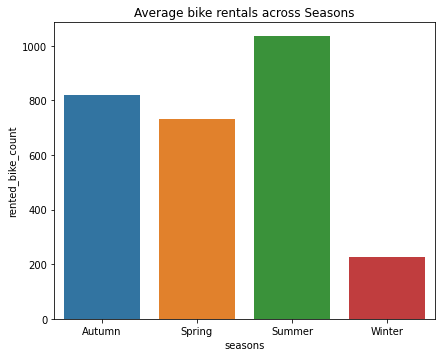

In [25]:
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
group_season = bike_df.groupby(['seasons'])['rented_bike_count'].mean().reset_index()
ax = sns.barplot(data=group_season, x='seasons', y='rented_bike_count', ax=axes)
ax.set(xlabel='seasons', ylabel='rented_bike_count', title='Average bike rentals across Seasons')

####Checking for outliers on Season column

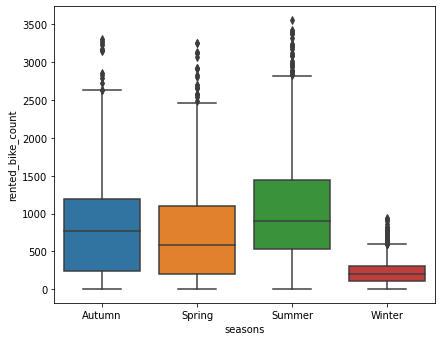

In [26]:
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
sns.boxplot(data=bike_df, y='rented_bike_count', x='seasons')

#### <b>Rented Bike Count vs Functioning Day (Bivariavate categorical data)
</b>

[Text(0, 0.5, 'rented_bike_count'),
 Text(0.5, 0, 'functioning_day'),
 Text(0.5, 1.0, 'Average bike rentals across Functioning Day')]

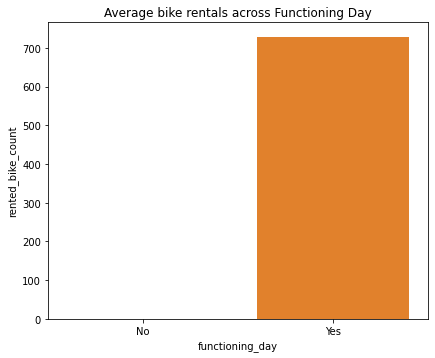

In [27]:
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
group_workingday = bike_df.groupby(['functioning_day'])['rented_bike_count'].mean().reset_index()
ax = sns.barplot(data=group_workingday, x='functioning_day', y='rented_bike_count')
ax.set(xlabel='functioning_day', ylabel='rented_bike_count', title='Average bike rentals across Functioning Day')

#### Checking for outliers on Functioning Day column

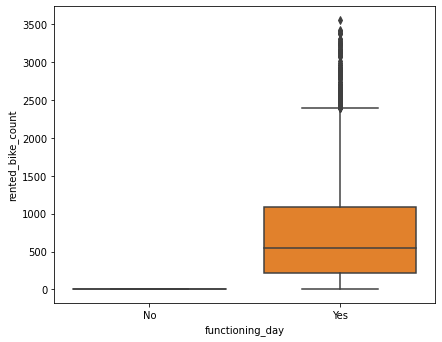

In [28]:
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
sns.boxplot(data=bike_df, y='rented_bike_count', x='functioning_day')

#### <b>Rented Bike Count vs Holiday (Bivariavate categorical data)
</b>

[Text(0, 0.5, 'rented_bike_count'),
 Text(0.5, 0, 'holiday'),
 Text(0.5, 1.0, 'Average bike rentals across Holiday')]

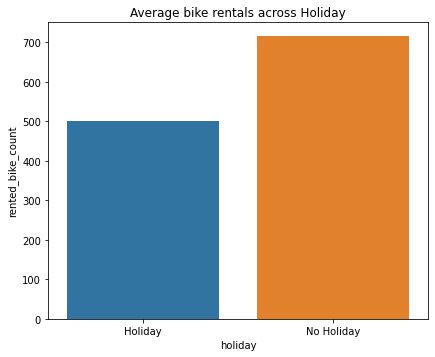

In [29]:
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
group_holiday = bike_df.groupby(['holiday'])['rented_bike_count'].mean().reset_index()
ax = sns.barplot(data=group_holiday, x='holiday', y='rented_bike_count')
ax.set(xlabel='holiday', ylabel= 'rented_bike_count', title='Average bike rentals across Holiday')

#### Checking for outliers on Holiday Column

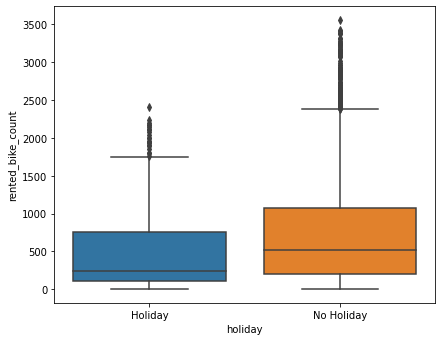

In [30]:
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
sns.boxplot(data=bike_df, y='rented_bike_count', x='holiday')

<b>Few Observations :-

* Bike reservations are lesser in Spring season compared to Summer and Fall
Lots of outlier points for a particular seasons. This is most likely due to variable distribution across the day.
* Bike sharing demand is high when there is a working day which might be because a lot of customer use these bikes to travel offices. No demand for rentak bikes when it is not a working day.
* Bike sharing demand is high on a No holiday condition compared to demand on a holiday which again proofs that people prefer to rent bike for professional purpose.

#### <b>Rented Bike Count Vs Temperature

In [31]:
temp_wrt_bike_rent_count = bike_df.groupby(['temperature'])['rented_bike_count'].mean().reset_index()

Text(0.5, 1.0, 'Average rented bike count wrt temperature')

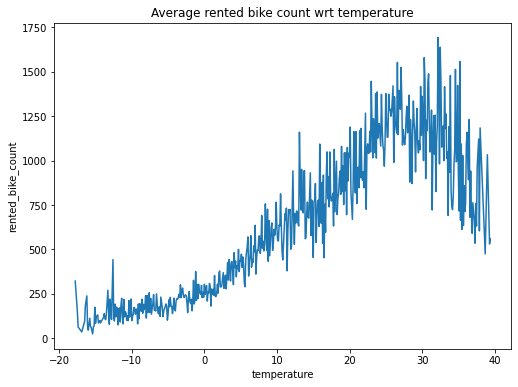

In [32]:
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
ax = sns.lineplot(x = 'temperature', y ='rented_bike_count', data = temp_wrt_bike_rent_count)
ax.set_title('Average rented bike count wrt temperature')

Observation

From the above line plot, we can see that there is a steady increase in the average bikes rented with temperature with a small decrease at the highest temperature.

#### <b> Chart - 6 - Hourly Rented Bike Counts (Univariate Categorical Data)

[Text(0.5, 1.0, 'Hourly Count based on Holiday or not')]

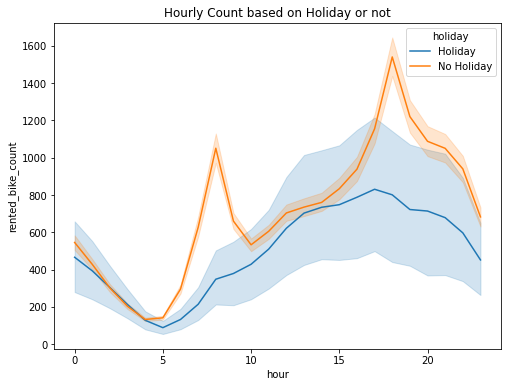

In [33]:
# seaborn boxplots across hours
f, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(data=bike_df, y='rented_bike_count', x='hour', ax=axes, hue= 'holiday')
axes.set(title='Hourly Count based on Holiday or not')

#### Hourly distribution vs rented bike count over weekends

[Text(0, 0.5, 'rented_bike_count'),
 Text(0.5, 0, 'Hour in the day'),
 Text(0.5, 1.0, 'Average Bike Rentals by the day across Weekdays and Weekends')]

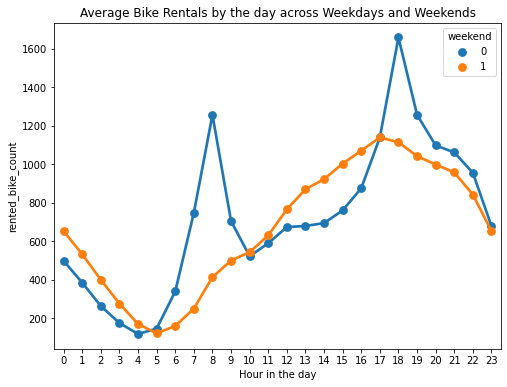

In [34]:
f, axes = plt.subplots(1, 1, figsize=(8, 6))
group_day_hour = bike_df.groupby(['weekend', 'hour'])['rented_bike_count'].mean().reset_index()
ax =sns.pointplot(data=group_day_hour, x='hour', y='rented_bike_count', hue='weekend')
ax.set(xlabel='Hour in the day', ylabel='rented_bike_count', title='Average Bike Rentals by the day across Weekdays and Weekends')

#### <b>Few Observation

<b>Monthly Distribution

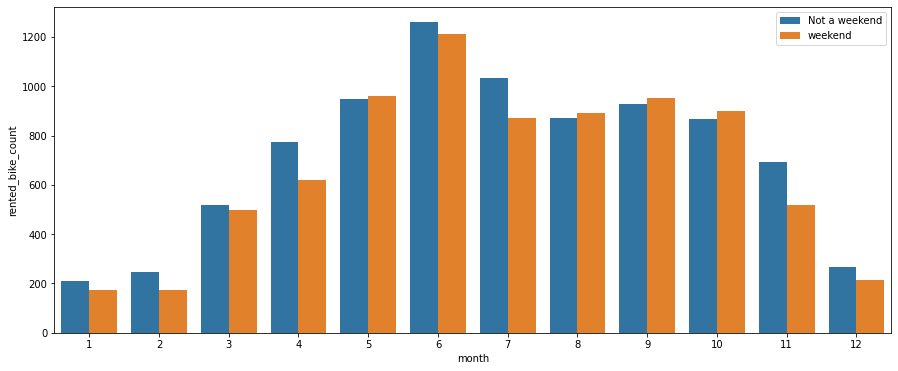

In [35]:
# Average Monthly Count Distribution plot
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
group_month = bike_df.groupby(['month', 'weekend'])['rented_bike_count'].mean().reset_index()
sns.barplot(data=group_month, x='month', y='rented_bike_count', hue='weekend')
ax.set(xlabel='Month', ylabel='rented_bike_count', title='Average bike rentals per Month')
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a weekend', 'weekend'])
plt.show()

Observations

* Lesser number of outliers can be seen in the seaborn box plot across hours indicating that most of the outliers are due to highly varying distribution during the day.
*Higher reservations can be seen at around 8am and 5pm (office hours) and close to 0 reservations very early in the morning
*From the above plot we can see the 2 patterns across the hours in a day in bike rentals
* Working Day: First pattern where there is a peak in the rentals at around 8am and another at around 5pm. These correspond to working local bikers who typically are registered and go to work on working day which are Monday to Friday
*Non Working Day: Second pattern where there is more or less a uniform rentals across the day with a peak at around noon time. These correspond to probably tourists who typically are casual users who rent/drop off bikes uniformly during the day and tour the city of Washington on non working days which typically are Saturday and Sunday
*Also, we can see that we have more bike rentals during the Fall (July to September) and Summer (April to June) Season.

<b> Holiday: Rented bike count Vs Hour with Temperature (Multivariate Analysis)

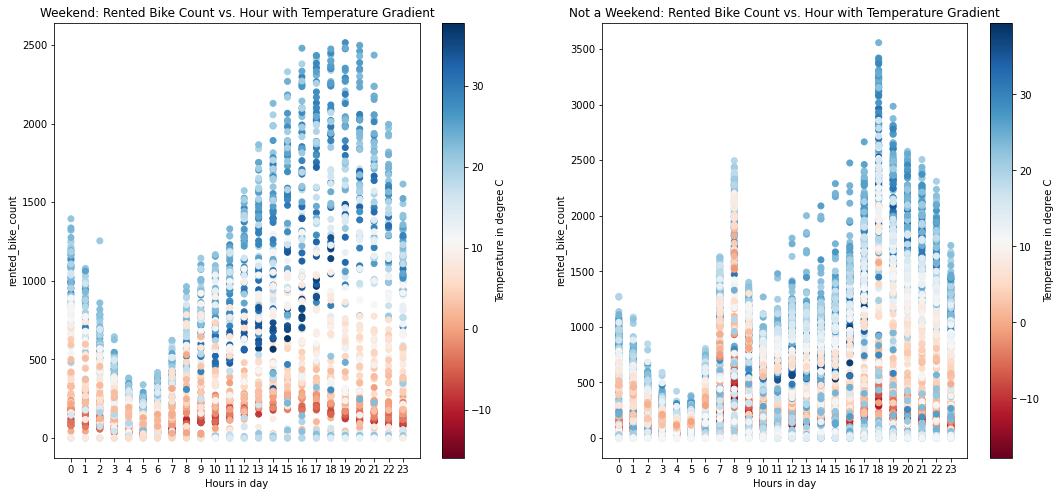

In [36]:
bike_df_w = bike_df[bike_df.weekend==1]
bike_df_nw = bike_df[bike_df.weekend==0]

fig = plt.figure(figsize=(18, 8))
# Weekend
axes = fig.add_subplot(1, 2, 1)
f = axes.scatter(bike_df_w.hour, bike_df_w['rented_bike_count'], c=bike_df_w.temperature, cmap = 'RdBu')
axes.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count', title='Weekend: Rented Bike Count vs. Hour with Temperature Gradient')
cbar = plt.colorbar(f)
cbar.set_label('Temperature in degree C')

# Not a Weekend
axes = fig.add_subplot(1, 2, 2)
f = axes.scatter(bike_df_nw.hour, bike_df_nw['rented_bike_count'], c=bike_df_nw.temperature, cmap = 'RdBu')
axes.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count', title='Not a Weekend: Rented Bike Count vs. Hour with Temperature Gradient')
cbar = plt.colorbar(f)
cbar.set_label('Temperature in degree C')

plt.show()

From the above, we can see that in general, more people tend to prefer biking at moderate to high temperatures; however, if the temperature is too hot (darkest of the blue dots), there is a small decline in count.


rented bike count vs humidity

[Text(18.106250000000003, 0.5, 'rented_bike_count'),
 Text(0.5, 17.200000000000003, 'humidity'),
 Text(0.5, 1.0, 'Average bike rentals Vs Humidity')]

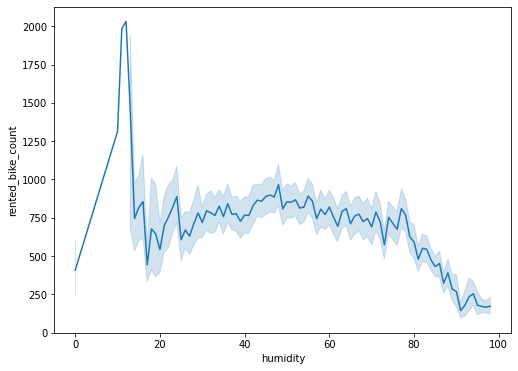

In [37]:
# Rented Bike count vs Humidity
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_humidity = bike_df.groupby(['humidity'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data=bike_df, x='humidity', y='rented_bike_count')
ax.set(xlabel='humidity', ylabel='rented_bike_count', title='Average bike rentals Vs Humidity')


Rented Bike Count Vs Wind Speed

[Text(0.5, 17.200000000000003, 'wind_speed'),
 Text(0.5, 1.0, 'Average bike rentals Vs wind_speed')]

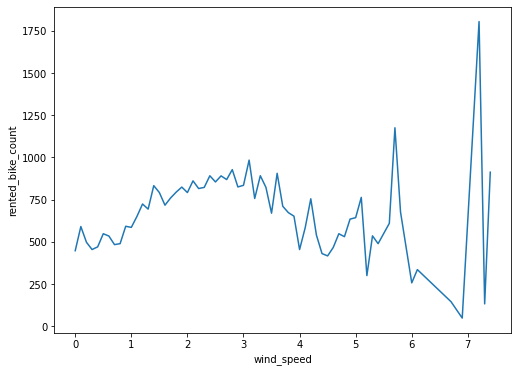

In [38]:
# Rented Bike count vs Wind Speed
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_wind_speed = bike_df.groupby(['wind_speed'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data=group_wind_speed, x='wind_speed', y = 'rented_bike_count')
ax.set(xlabel='wind_speed', title='Average bike rentals Vs wind_speed')

Rented Bike Count Vs Visibility

Rented Bike Count vs Dew Point Temperature

[Text(18.106250000000003, 0.5, 'rented_bike_count'),
 Text(0.5, 17.200000000000003, 'dew_point_temperature'),
 Text(0.5, 1.0, 'Average bike rentals Vs dew_point_temperature')]

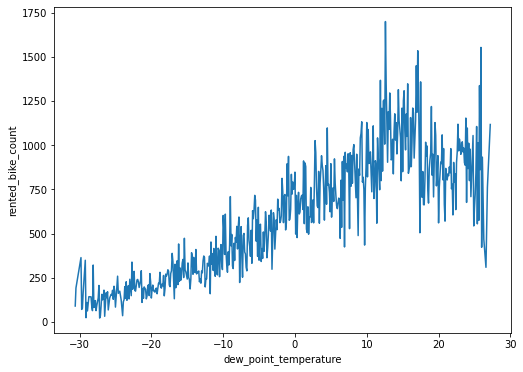

In [39]:
# Rented Bike count vs dew_point_temperature
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_dew_point_temperature = bike_df.groupby(['dew_point_temperature'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data = group_dew_point_temperature, x ='dew_point_temperature', y = 'rented_bike_count')
ax.set(xlabel='dew_point_temperature', ylabel='rented_bike_count', title='Average bike rentals Vs dew_point_temperature')

Rented Bike Count vs Solar Radiation

[Text(18.106250000000003, 0.5, 'rented_bike_count'),
 Text(0.5, 17.200000000000003, 'solar_radiation'),
 Text(0.5, 1.0, 'Average bike rentals Vs solar_radiation')]

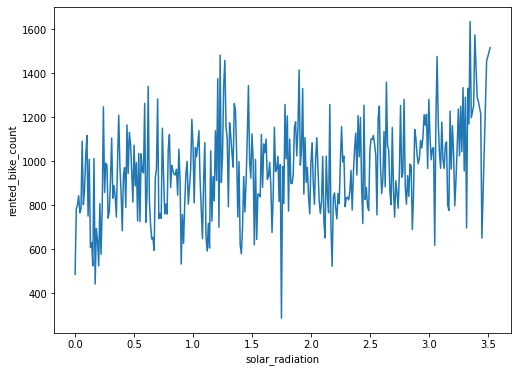

In [40]:
# Rented Bike count vs solar_radiation
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_solar_radiation = bike_df.groupby(['solar_radiation'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data = group_solar_radiation, x ='solar_radiation', y = 'rented_bike_count')
ax.set(xlabel='solar_radiation', ylabel='rented_bike_count', title='Average bike rentals Vs solar_radiation')

Rented Bike Count vs Rainfall

[Text(18.106250000000003, 0.5, 'rented_bike_count'),
 Text(0.5, 17.200000000000003, 'rainfall'),
 Text(0.5, 1.0, 'Average bike rentals Vs rainfall')]

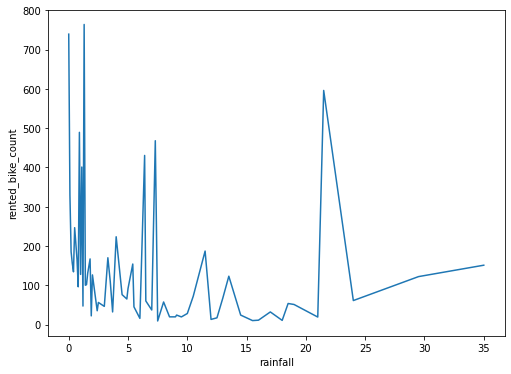

In [41]:
# Rented Bike count vs rainfall
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_rainfall = bike_df.groupby(['rainfall'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data = group_rainfall, x ='rainfall', y = 'rented_bike_count')
ax.set(xlabel='rainfall', ylabel='rented_bike_count', title='Average bike rentals Vs rainfall')

Rented Bike Count vs Snowfall

[Text(18.106250000000003, 0.5, 'rented_bike_count'),
 Text(0.5, 17.200000000000003, 'snowfall'),
 Text(0.5, 1.0, 'Average bike rentals Vs snowfall')]

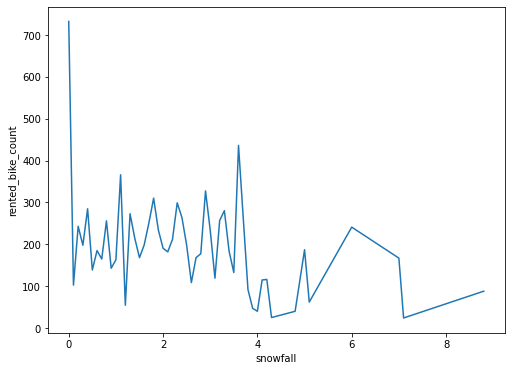

In [42]:
# Rented Bike count vs snowfall
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
group_snowfall = bike_df.groupby(['snowfall'])['rented_bike_count'].mean().reset_index()
sns.lineplot(data = group_snowfall, x ='snowfall', y = 'rented_bike_count')
ax.set(xlabel='snowfall', ylabel='rented_bike_count', title='Average bike rentals Vs snowfall')

## **6. Outlier Analysis**

#### <b> Zscore > 4 Pruning </b>
Let us first take a look at the data entries with zscore > 4, i.e., data with more than 4 standard deviation away from the mean.

In [43]:
 # Function to calculate zscore
def zscore(series): 
    return (series-series.mean())/series.std()

bike_df['count_zscore'] = bike_df.groupby(['hour', 'functioning_day'])['rented_bike_count'].transform(zscore)
outlier_idx = np.abs(bike_df['count_zscore'])>4
outlier_data = bike_df.loc[outlier_idx, :]
print('Shape of the outlier data entries: ', outlier_data.shape)
outlier_data

Shape of the outlier data entries:  (1, 16)


,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekend,count_zscore
4922,1254,2,20.9,87,1.8,222,18.6,0.0,0.0,0.0,Summer,No Holiday,Yes,6,1,4.577229


Let us prune out this outliers. This could be due to some late night shows or holiday or some party.

In [44]:
# Removing outliers from my data
bike_df_without_outliers = bike_df.loc[~outlier_idx, :]
print('Shape of data before outliner pruning: ', bike_df.shape)
print('Shape of data after outlier pruning: ', bike_df_without_outliers.shape)

Shape of data before outliner pruning:  (8760, 16)
Shape of data after outlier pruning:  (8759, 16)


Dropping the Zscore >4 column from the data frame

In [45]:
# Dropping the zscore column
bike_df_without_outliers = bike_df_without_outliers.drop('count_zscore', axis=1)
bike_df_without_outliers.head(n=3)

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


#### <b> Correlation Analysis </b>
Regression Plots
* Using seaborn to get regression plots with respect to some features

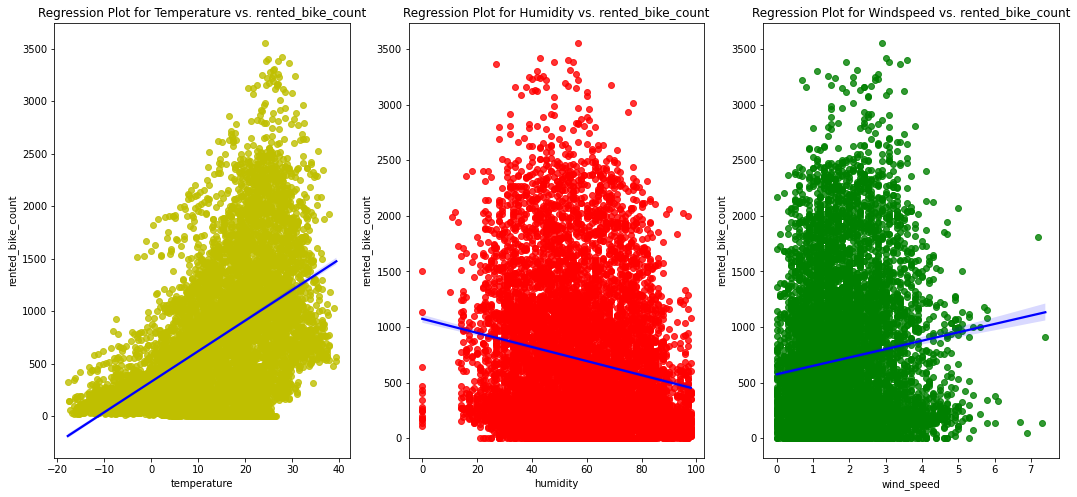

In [46]:
# Regression Plots with respect to Temperature, Humidity and Windspeed
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 3, 1)
sns.regplot(data =bike_df_without_outliers, x='temperature', y='rented_bike_count',ax=axes,scatter_kws={"color": 'y'}, line_kws={"color":"b"})
axes.set(title='Regression Plot for Temperature vs. rented_bike_count')
axes = fig.add_subplot(1, 3, 2)
sns.regplot(data=bike_df_without_outliers, x='humidity', y='rented_bike_count',ax=axes,scatter_kws={"color": 'r'}, line_kws={"color":"b"})
axes.set(title='Regression Plot for Humidity vs. rented_bike_count')
axes = fig.add_subplot(1, 3, 3)
sns.regplot(data=bike_df_without_outliers, x='wind_speed', y='rented_bike_count',ax=axes, scatter_kws={"color":'g'}, line_kws={"color":"b"})
axes.set(title='Regression Plot for Windspeed vs. rented_bike_count')
plt.show()

#### Observations

The above regplot indicates a positive correlation of rented_bike_count with temperature and windspeed and a negative correlation with humidity. We will check correlation of all numerical variables with each other through Heatmap.

#### <b> Heatmap Plot </b>
Using heatmap plots of all the numerical features to obtain correlation of the bike rental with other numerical features

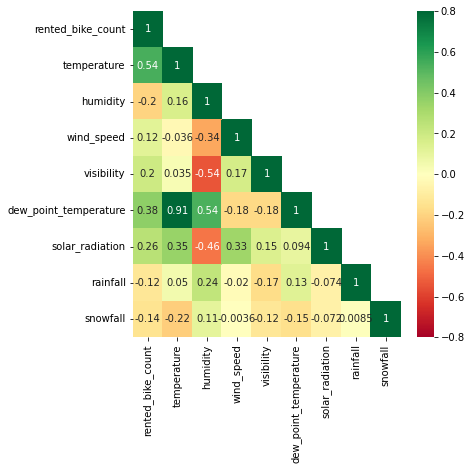

In [47]:
# Heatmap relative to all numeric columns
corr_matrix = bike_df_without_outliers.corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

fig = plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cbar=True, vmax=0.8, vmin=-0.8, cmap='RdYlGn')
plt.show()

#### Inferences from the above heatmap

* <b> Very Highly Correlated (0.7 - 0.9) : </b> temperature and dew_point_temperature are very highly correlated as expected.

* <b> Moderately Correlated (0.5 - 0.7) : </b> We see a moderate correlation between humidity and dew_point_temperature and temperature and rented _bike_count. This is probably only true for the range of temperatures provided.
* <b> Negative Correlation (less than 0) :</b> We see a negative correlation between visibility and humidity and solar_radiation and humidity. The more the humidity, the less people prefer to bike.
* <b> Low Correlation(near zero):</b> rented_bike_count has a weak dependence on windspeed, snowfall, and rainfall.

## **7. Feature Engineering**

We have lots of categorical columns. We will transform each relevant and important categorical columns into binary vector columns. Later drop all the columns that are not required (redundant or very low correlation).

#### <b>Column transformations need to be done:</b>

* season: month column has a direct mapping with season (Winter: January to March, Summer: April to June, Autumn: July to September and Spring: October to December). Hence we will drop season column.
* holiday and 'day': functioning_day = weekday and not a holiday. Since we noticed that there were two kinds of bike rental behavoirs - during functioning days and not a functioning day, we will retain only the workingday column and drop 'day' and 'holiday' column
* functioning_day: After observing the bike rental trend, we propose to build 2 separate models for 1. if it is a weekend, and 2. if it is not a weekend. Hence, we can separate out the data based on this column and drop the column.
* temperature: temperature and dew_point_temperature are highly correlated. Hence retain only the temperature column.
* windspeed, rainfall, snowfall: Very poorly correlated with count. Hence drop this column
* Date: Intuitively, there is should be no dependency on date. Hence drop this column
* hour: Split hour column to hour_0, hour_1, ..., hour_23. Drop hour_23 since it is a function of the rest of the hour columns.
* month: Split month column to month_1, month_2, ..., month_12. Drop month_12 since it is a function of the rest of the month columns

In [48]:
# Using numbers to represent categorical data to transform the categorical columns
season_dict = {'Spring':1, 'Summer':2, 'Autumn':3, 'Winter':4}
holiday_dict ={'No Holiday':0, 'Holiday': 1}
functioning_day_dict ={'No':0, 'Yes':1}

bike_df_without_outliers['seasons'] = bike_df_without_outliers['seasons'].map(season_dict)
bike_df_without_outliers['holiday'] = bike_df_without_outliers['holiday'].map(holiday_dict)
bike_df_without_outliers['functioning_day'] = bike_df_without_outliers['functioning_day'].map(functioning_day_dict)
bike_df_without_outliers.head(3)

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0,1,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0,1,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0,1,12,0


In [49]:
bike_df_without_outliers.head(3)

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0,1,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0,1,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0,1,12,0


In [50]:
# Dropping columns from the provided data set that are either highly correlated with the existing columns: 
# season with month, holiday and day with functioning_day, temperature with dew_point_temperature
# or poorly correlated with the target column: windspeed, rainfall and snowfall

to_drop = ['seasons', 'holiday', 'dew_point_temperature', 'wind_speed', 'rainfall', 'snowfall']
bike_df_without_outliers = bike_df_without_outliers.drop(to_drop, axis=1)
bike_df_without_outliers.head(n=3)

,rented_bike_count,hour,temperature,humidity,visibility,solar_radiation,functioning_day,month,weekend
0,254,0,-5.2,37,2000,0.0,1,12,0
1,204,1,-5.5,38,2000,0.0,1,12,0
2,173,2,-6.0,39,2000,0.0,1,12,0


####**Transforming all the categorical columns into binary columns...**

In [51]:
# Transforming all the categorical columns into binary columns
month=pd.get_dummies(bike_df_without_outliers['month'], prefix='month')
hour=pd.get_dummies(bike_df_without_outliers['hour'], prefix='hour')

bike_df_ready=pd.concat([bike_df_without_outliers, month, hour],axis=1)
bike_df_ready.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'visibility',
       'solar_radiation', 'functioning_day', 'month', 'weekend', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [52]:
bike_df_without_outliers.head(3)

,rented_bike_count,hour,temperature,humidity,visibility,solar_radiation,functioning_day,month,weekend
0,254,0,-5.2,37,2000,0.0,1,12,0
1,204,1,-5.5,38,2000,0.0,1,12,0
2,173,2,-6.0,39,2000,0.0,1,12,0


**Dropping columns and the last binary vector column (which are fully correlated and can be expressed as a function of other columns)**

In [53]:
# Dropping columns and the last binary vector column 
to_drop2 = ['month_12', 'hour_23']
bike_df_ready = bike_df_ready.drop(to_drop2, axis=1)
bike_df_ready.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'visibility',
       'solar_radiation', 'functioning_day', 'month', 'weekend', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'hour_0', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22'],
      dtype='object')

####**Normalise rented_bike_count (Dependent Variable) column**

The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data.

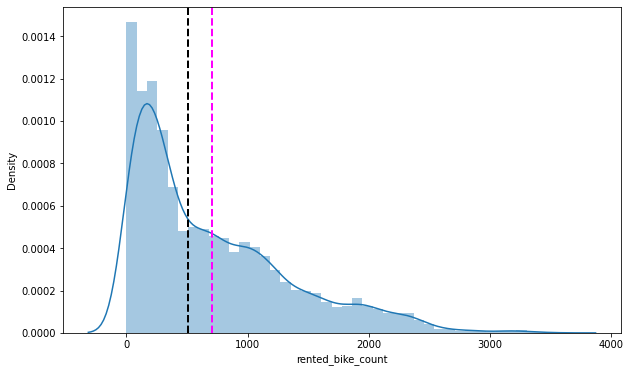

In [54]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
ax=sns.distplot(bike_df_ready['rented_bike_count'],hist=True)
plt.xlabel('rented_bike_count')
plt.ylabel('Density')
ax.axvline(bike_df_ready['rented_bike_count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df_ready['rented_bike_count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

* ***The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.***

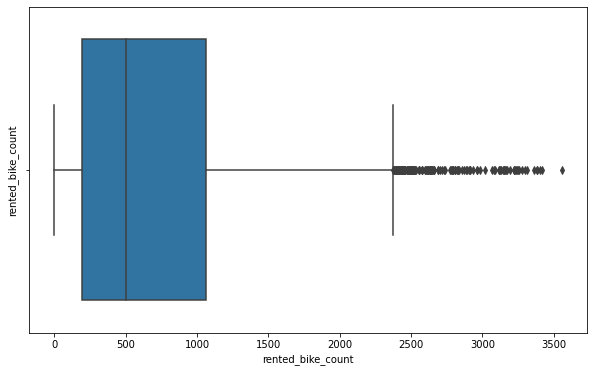

In [55]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
sns.boxplot(bike_df_ready['rented_bike_count'])
plt.ylabel('rented_bike_count')
plt.show()

* ***The above boxplot shows that we have detect outliers in Rented Bike Count column***

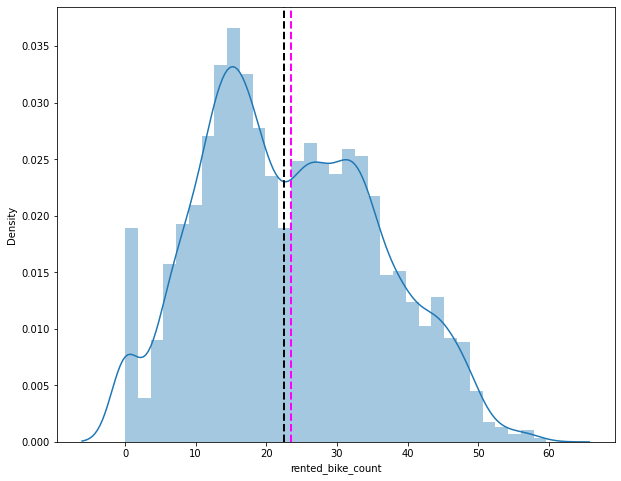

In [56]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
ax=sns.distplot(np.sqrt(bike_df_ready['rented_bike_count']))
plt.xlabel('rented_bike_count')
plt.ylabel('Density')
ax.axvline(np.sqrt(bike_df_ready['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df_ready['rented_bike_count']).median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

* ***Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.***

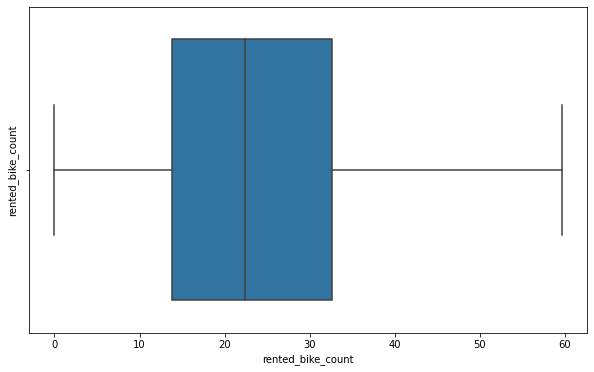

In [57]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))
sns.boxplot(x=np.sqrt(bike_df_ready['rented_bike_count']))
plt.ylabel('rented_bike_count')
plt.show()

* ***After applying Square root to the Rented Bike Count column, we find that there is no outliers present.***

## **7. MODELLING**

#### Data and Function Definition
<b>Train/Validation/Test Split:</b>

First split the labelled data provided into internal training and testing set. 
* <b>1. Training set, model_train: </b>
This will contain data of from the 1st to 15th of every month.
This will be used to train our model
* <b>2. Testing set, model_test: </b>
This will contain data from 16th to 19th of every month.
This will be used to test our model.

The final test data for which labels (count) have not been provided corresponds to 20th to the end of every month

In [58]:
# Contains Binary Vector Form of features (Obtained from OneHotEncoder transformed categorical feature)
X = bike_df_ready.drop('rented_bike_count', axis=1)
y = np.sqrt(bike_df_ready['rented_bike_count'])

In [59]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(f'X_train shape =',X_train.shape)
print(f'X_test shape =',X_test.shape)
print(f'y_train shape =',y_train.shape)
print(f'y_test shape =',y_test.shape)

X_train shape = (6569, 42)
X_test shape = (2190, 42)
y_train shape = (6569,)
y_test shape = (2190,)


#### Evaluation Metrics -
* The mean squared error (MSE) :- It tells you how close a regression line is to a set of points.

* Root Mean Square Error (RMSE) :- It is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE) :- These are metrics used to evaluate a Regression Model. ... Here, errors are the absolute differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2):- It is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Adjusted R-squared :- It is a modified version of R-squared that has been adjusted for the number of predictors in the model.
​


#### **1st Model -Linear Regression**

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line.

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. 

Let us now implement our first model.
We will be using LinearRegression from scikit library.


In [60]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [61]:
#check the score
reg.score(X_train, y_train)

0.7572206937827596

In [62]:
#check the coefficeint
reg.coef_

array([ 2.46645627e-01,  5.60119679e-01, -1.43402426e-01,  1.28750500e-03,
        1.22733903e+00,  2.90693362e+01,  7.75745501e+07, -1.24746738e+00,
        8.53320049e+08,  7.75745498e+08,  6.98170951e+08,  6.20596402e+08,
        5.43021854e+08,  4.65447305e+08,  3.87872749e+08,  3.10298196e+08,
        2.32723652e+08,  1.55149105e+08,  7.75745555e+07,  3.97469278e+00,
        1.99081268e+00, -1.04222744e+00, -3.97573113e+00, -6.14697743e+00,
       -5.93076997e+00, -1.27223078e+00,  4.93360906e+00,  1.02438739e+01,
        2.56203247e+00, -2.30238057e+00, -3.00961629e+00, -2.65221900e+00,
       -3.42162218e+00, -3.45517339e+00, -2.81340865e+00, -7.49070450e-01,
        2.62002802e+00,  9.08659345e+00,  5.72296927e+00,  5.46611530e+00,
        4.62620328e+00,  3.75181066e+00])

In [63]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [64]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 37.49870759231109
RMSE : 6.123618831402808
MAE : 4.631941930070968
R2 : 0.7572206937827596
Adjusted R2 : 0.7524714013462789


Looks like our r2 score value is 0.76 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [65]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),2),
       'MSE':round((MSE_lr),2),
       'RMSE':round((RMSE_lr),2),
       'R2_score':round((r2_lr),2),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [66]:
# performance on test dataset
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 39.75328509745072
RMSE : 6.305020626251014
MAE : 4.780139380147357
R2 : 0.7462667990840166
Adjusted R2 : 0.741303224590085


The r2_score for the test set is 0.74. This means our linear model is  performing well on the test data. Let us try to visualize our residuals and see if there is heteroscedasticity (unequal variance or scatter).




In [67]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),2),
       'MSE':round((MSE_lr),2),
       'RMSE':round((RMSE_lr),2),
       'R2_score':round((r2_lr),2),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

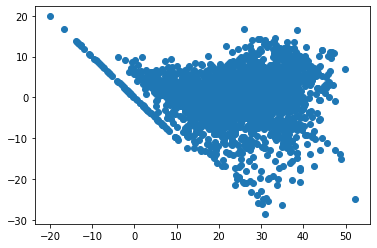

In [68]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

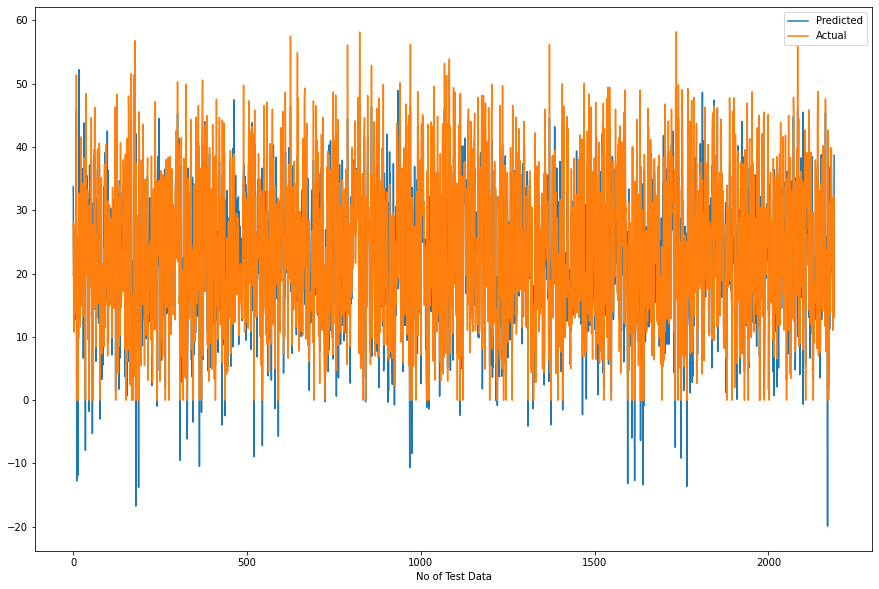

In [69]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#### **2nd Model -Lasso (Regularization Model)** 

In [70]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.4531383891444809 0.456976838882418


In [71]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [72]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 83.87315645584718
RMSE : 9.158228892959992
MAE : 6.791020865571764
R2 : 0.456976838882418
Adjusted R2 : 0.4463541221768109


Looks like our r2 score value is 0.45 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons

In [73]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),2),
       'MSE':round((MSE_l),2),
       'RMSE':round((RMSE_l),2),
       'R2_score':round((r2_l),2),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [74]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 85.67875802894649
RMSE : 9.256282084560004
MAE : 6.944204612053192
R2 : 0.4531383891444809
Adjusted R2 : 0.44244058399500175


**The r2_score for the test set is 0.45. This means our linear model is  not performing well on the test data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [75]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

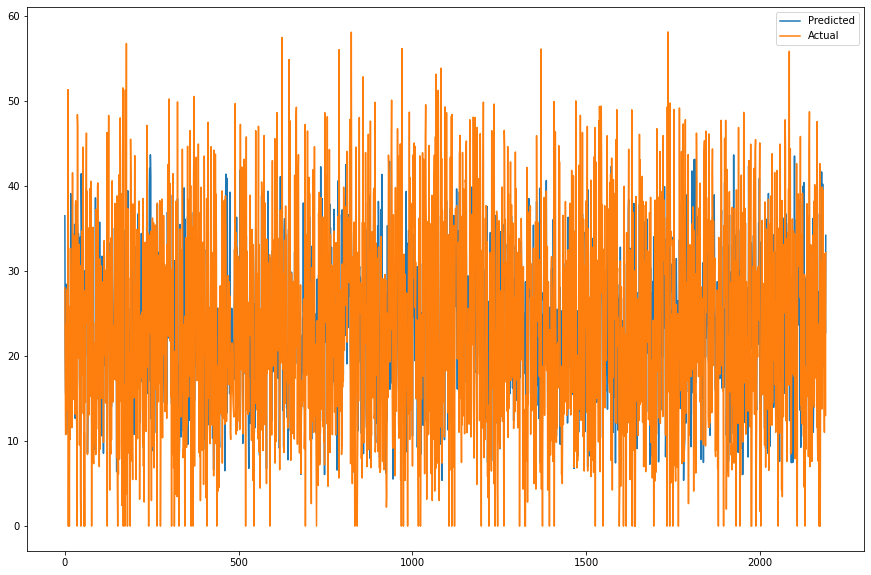

In [76]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

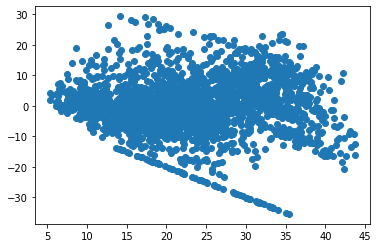

In [77]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

#### **3rd Model -Ridge (Regularization Model)**

In [78]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [79]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [80]:
#check the score
ridge.score(X_train, y_train)

0.7572206057354925

In [81]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [82]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 37.49872119173508
RMSE : 6.123619941810161
MAE : 4.632035255522214
R2 : 0.7572206057354925
Adjusted R2 : 0.7524713115766154


Looks like our r2 score value is 0.76 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [83]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [84]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 39.751795604679025
RMSE : 6.304902505564938
MAE : 4.780231222524114
R2 : 0.7462763060660882
Adjusted R2 : 0.7413129175494491


The r2_score for the test set is 0.78. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)




In [85]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

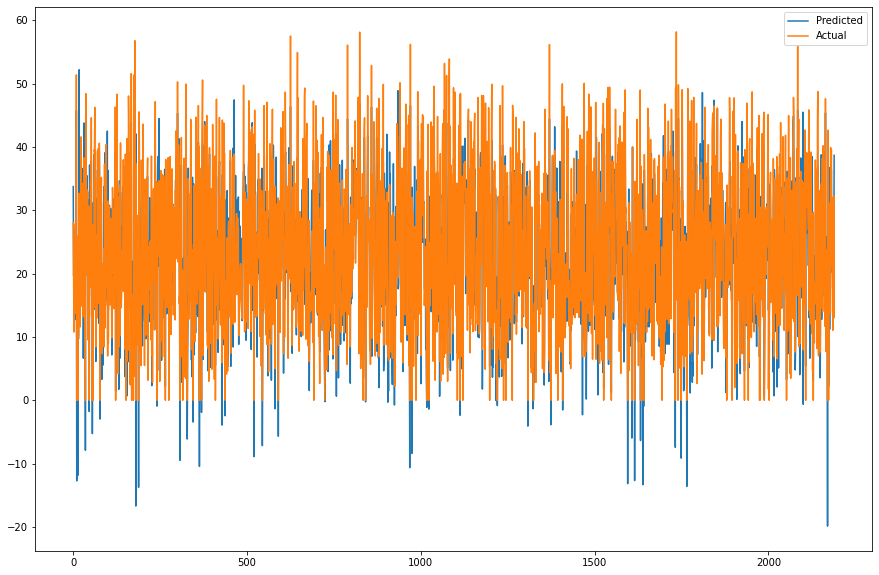

In [86]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

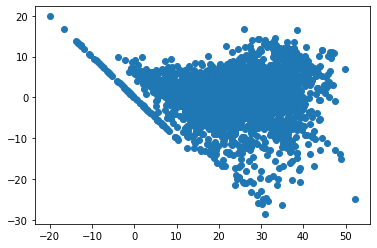

In [87]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

#### **4th Model -Elastic Net (Regularization Model)**

In [88]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [89]:
#Fit the model
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [90]:
#check the score
elasticnet.score(X_train, y_train)

0.6279010249947612

In [91]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [92]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 57.47289946794181
RMSE : 7.581088277281951
MAE : 5.73828610026378
R2 : 0.6279010249947612
Adjusted R2 : 0.6206219579476164


Looks like our r2 score value is 0.62 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons

In [93]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),2),
       'MSE':round((MSE_e),2),
       'RMSE':round((RMSE_e),2),
       'R2_score':round((r2_e),2),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [94]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 58.48835705215875
RMSE : 7.647768109204067
MAE : 5.858671650946587
R2 : 0.6266864986181269
Adjusted R2 : 0.6193836727876478


The r2_score for the test set is 0.62. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).




In [95]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),2),
       'MSE':round((MSE_e),2),
       'RMSE':round((RMSE_e),2),
       'R2_score':round((r2_e),2),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

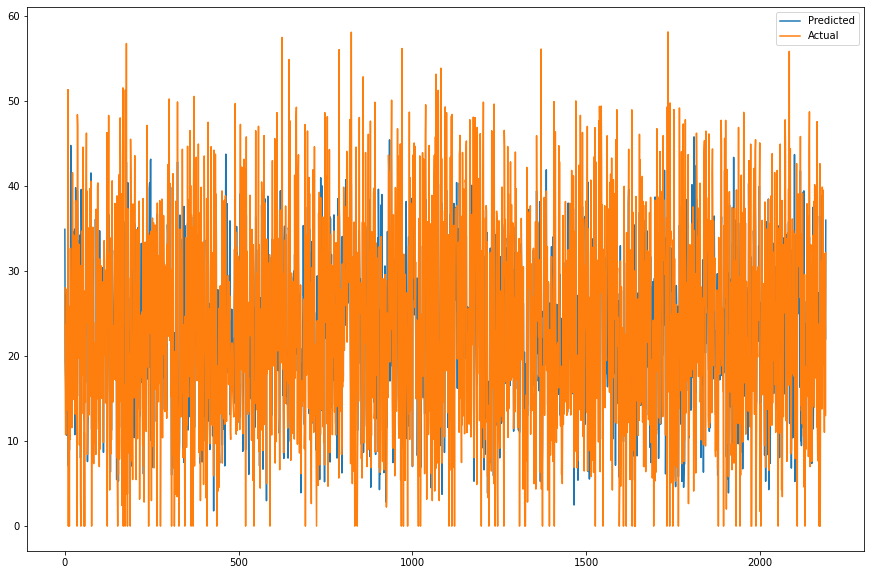

In [96]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

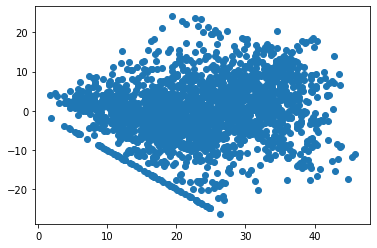

In [97]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

#### **5th Model - Decision Tree**

In [98]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [99]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [100]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.6352393320073216
MSE : 56.33945431079824
RMSE : 7.505961251618492
MAE : 5.0626776454052855
R2 : 0.6352393320073216
Adjusted R2 : 0.6281038182412795


Looks like our r2 score value is 0.69 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [101]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [102]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 63.33926089254783
RMSE : 7.958596666030251
MAE : 5.411041808979762
R2 : 0.5957246458872065
Adjusted R2 : 0.5878161387271053


The r2_score for the test set is 0.69. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)




In [103]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),2),
       'MSE':round((MSE_d),2),
       'RMSE':round((RMSE_d),2),
       'R2_score':round((r2_d),2),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

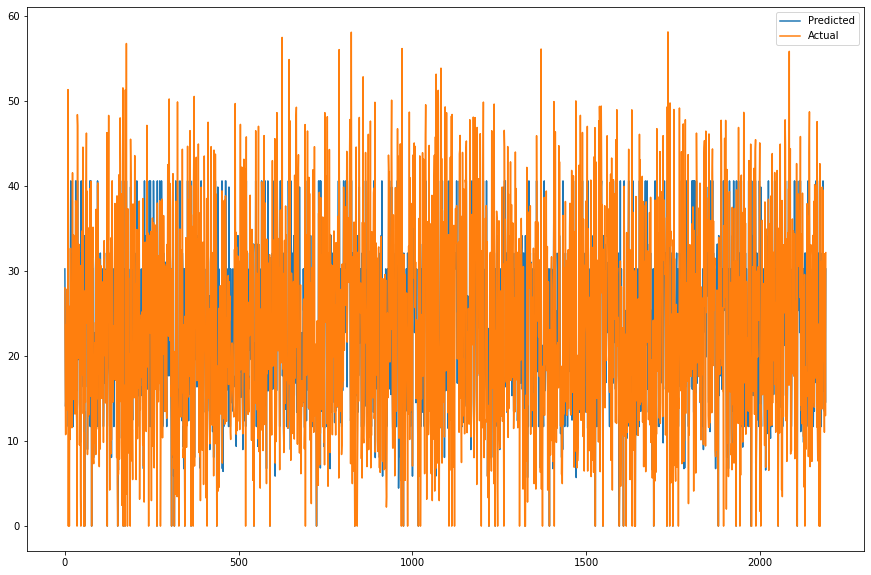

In [104]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

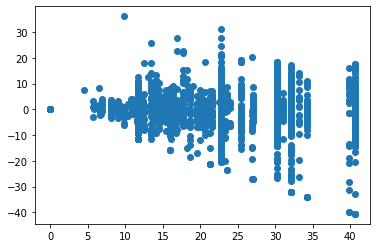

In [105]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

#### **6th Model - Random Forest**

In [106]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [107]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [108]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9881878292856375
MSE : 1.8244600108214826
RMSE : 1.3507257348631079
MAE : 0.819214672027532
R2 : 0.9881878292856375
Adjusted R2 : 0.9879567574784632


**Looks like our r2 score value is 0.98 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**



In [109]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),2),
       'MSE':round((MSE_rf),2),
       'RMSE':round((RMSE_rf),2),
       'R2_score':round((r2_rf),2),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [110]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 12.098311060969884
RMSE : 3.478262649796574
MAE : 2.1612003814466245
R2 : 0.922780137952071
Adjusted R2 : 0.9212695491276588


**The r2_score for the test set is 0.91. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [111]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),2),
       'MSE':round((MSE_rf),2),
       'RMSE':round((RMSE_rf),2),
       'R2_score':round((r2_rf),2),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

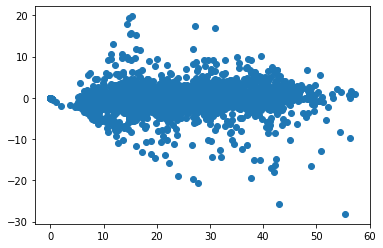

In [112]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

In [113]:
rf_model.feature_importances_

array([2.22945705e-01, 3.06103495e-01, 1.58232471e-01, 1.66745123e-02,
       3.70971696e-02, 1.59329600e-01, 1.89324362e-02, 2.38432854e-02,
       1.38496520e-04, 1.87195993e-04, 1.81666196e-03, 1.13943790e-03,
       1.17861946e-03, 3.28151780e-03, 7.86566706e-04, 2.07750269e-03,
       1.45949550e-03, 2.05968734e-03, 8.81940161e-03, 3.33189570e-04,
       3.16053181e-04, 9.33067915e-04, 5.67412521e-04, 4.54304483e-04,
       4.87415537e-04, 1.30900907e-03, 1.52820777e-03, 1.13717844e-02,
       4.66784833e-04, 9.28164180e-04, 3.23135195e-04, 3.46377412e-04,
       1.63034247e-04, 1.89520375e-04, 4.03673476e-04, 9.45573103e-04,
       7.92069602e-04, 9.46394450e-03, 9.51250214e-04, 4.41807994e-04,
       6.73651257e-04, 5.07311079e-04])

In [114]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [115]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [116]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,temperature,0.31
0,hour,0.22
2,humidity,0.16
5,functioning_day,0.16
4,solar_radiation,0.04
3,visibility,0.02
6,month,0.02
7,weekend,0.02
27,hour_8,0.01
37,hour_18,0.01


In [117]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [118]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

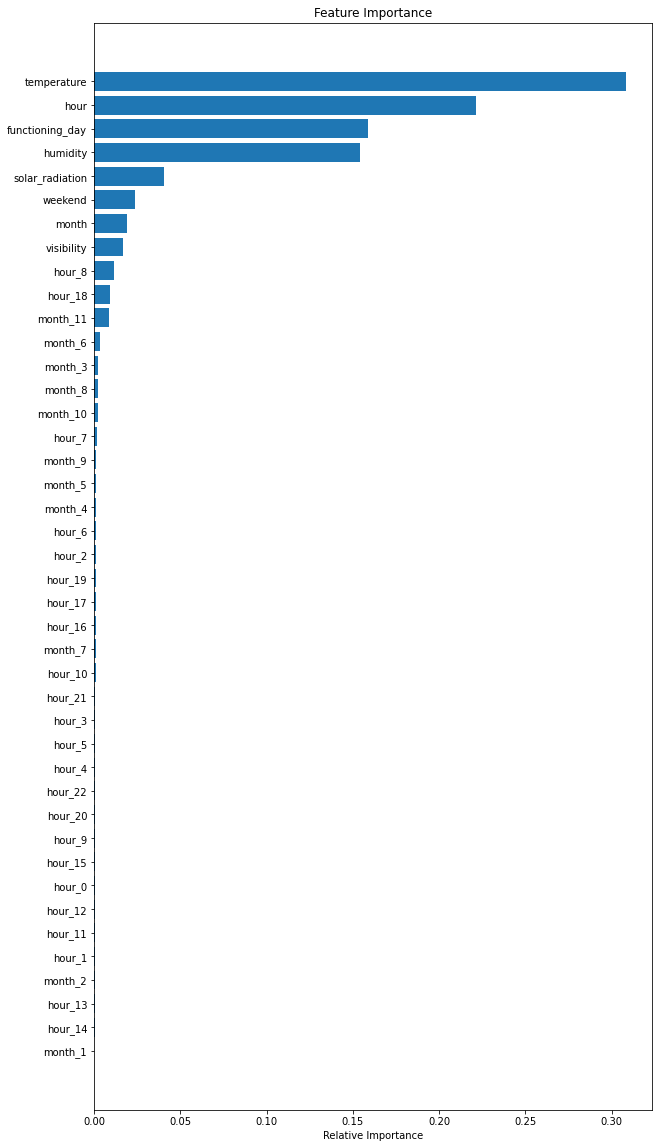

In [119]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### **7th Model - Gradient Boosting (Ensemble Method)**

In [120]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [121]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)


In [122]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8943871545179984
MSE : 16.312532037544283
RMSE : 4.038877571497344
MAE : 2.8541015996926724
R2 : 0.8943871545179984
Adjusted R2 : 0.8923211370469951


Looks like our r2 score value is 0.87 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [123]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [125]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 18.0882795712601
RMSE : 4.2530318093402615
MAE : 3.0709811628901464
R2 : 0.8845479797851138
Adjusted R2 : 0.8822894866090425


The r2_score for the test set is 0.86. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)




In [126]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

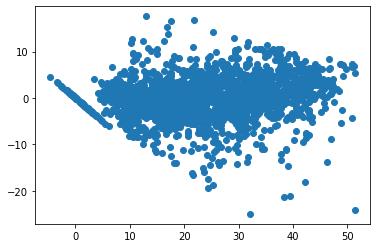

In [127]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))

In [128]:
gb_model.feature_importances_

array([2.13303482e-01, 3.20070987e-01, 1.50574303e-01, 1.91370087e-03,
       3.61983615e-02, 1.83237729e-01, 2.05365286e-02, 1.88063821e-02,
       0.00000000e+00, 1.10463629e-04, 3.13943455e-04, 0.00000000e+00,
       3.41013448e-04, 4.12161397e-03, 5.51676228e-04, 2.53306152e-03,
       0.00000000e+00, 3.90493835e-03, 9.91775349e-03, 5.86853329e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.74722879e-03,
       2.17936913e-03, 6.12613324e-04, 5.73411578e-04, 1.28526788e-02,
       0.00000000e+00, 1.57327413e-03, 7.41551729e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.14569556e-02, 2.40126385e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [129]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [130]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [131]:
importance_df.head()

,Feature,Feature Importance
0,hour,0.21
1,temperature,0.32
2,humidity,0.15
3,visibility,0.00
4,solar_radiation,0.04


In [132]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,temperature,0.32
0,hour,0.21
5,functioning_day,0.18
2,humidity,0.15
4,solar_radiation,0.04
6,month,0.02
7,weekend,0.02
27,hour_8,0.01
37,hour_18,0.01
18,month_11,0.01


In [133]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [134]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

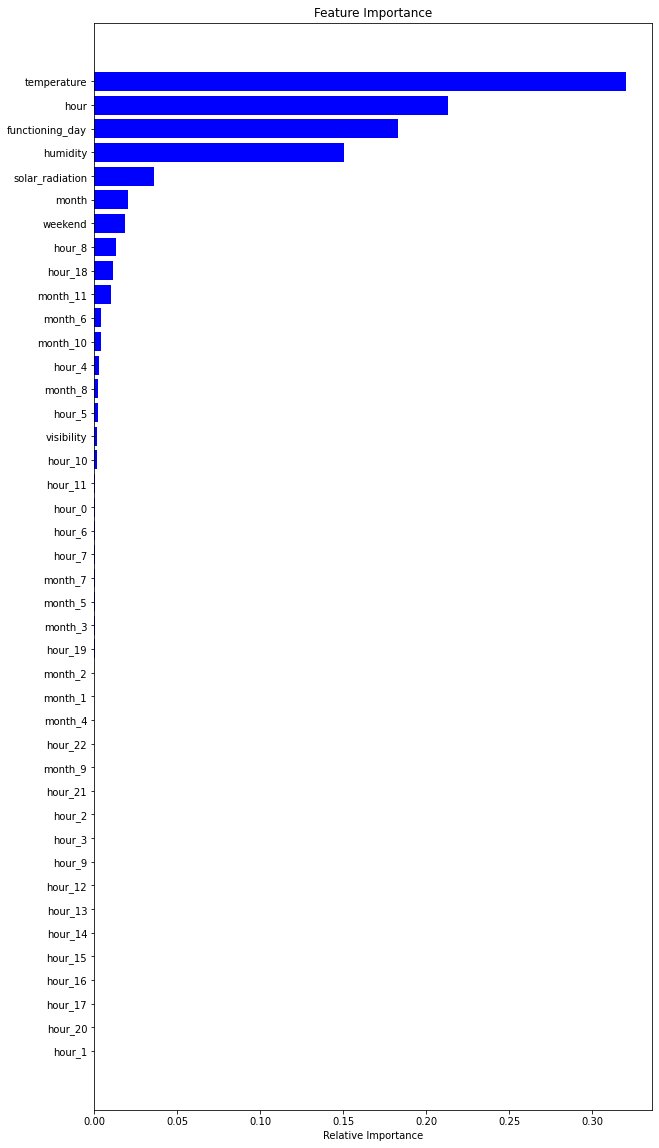

In [135]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### Hyperparameter tuning

Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

<b> Using GridSearchCV

GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

####**8th Model Gradient Boosting Regressor with GridSearchCV**

#### Provide the range of values for chosen hyperparameter

In [136]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [137]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [138]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [139]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [140]:
gb_optimal_model = gb_grid.best_estimator_

In [141]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [142]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [143]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9510500265382631
MSE : 7.5606144942624915
RMSE : 2.7496571594041486
MAE : 1.7595796450321235
R2 : 0.9510500265382631
Adjusted R2 : 0.950092458356897


In [144]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [145]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 12.23315000590714
RMSE : 3.497592029655137
MAE : 2.2196634899148986
R2 : 0.921919501729852
Adjusted R2 : 0.9203920769849306


In [146]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

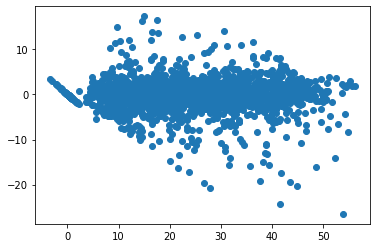

In [147]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))

In [148]:
gb_optimal_model.feature_importances_

array([2.30023454e-01, 3.20673698e-01, 1.64171005e-01, 8.48103539e-03,
       3.73978000e-02, 1.54636015e-01, 2.01998599e-02, 1.85834996e-02,
       1.67323273e-05, 3.64697316e-05, 1.02305391e-03, 3.14652127e-04,
       4.81488718e-04, 2.37798977e-03, 7.96341864e-04, 2.12389189e-03,
       2.25396529e-04, 1.82409295e-03, 8.74509013e-03, 4.82565638e-04,
       2.78777550e-04, 7.33308219e-04, 4.70657980e-04, 6.28967361e-04,
       5.12646934e-04, 6.04976976e-04, 9.24531059e-04, 1.12714459e-02,
       1.52282803e-04, 1.02695464e-03, 4.69749633e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.34044366e-06, 2.94457199e-05,
       9.10755907e-04, 9.22002731e-03, 3.74999241e-04, 8.92946385e-06,
       4.75862744e-05, 1.38259430e-04])

In [149]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [150]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [151]:
importance_df.head()

,Feature,Feature Importance
0,hour,0.23
1,temperature,0.32
2,humidity,0.16
3,visibility,0.01
4,solar_radiation,0.04


In [152]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,temperature,0.32
0,hour,0.23
2,humidity,0.16
5,functioning_day,0.15
4,solar_radiation,0.04
6,month,0.02
7,weekend,0.02
3,visibility,0.01
27,hour_8,0.01
37,hour_18,0.01


In [153]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [154]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

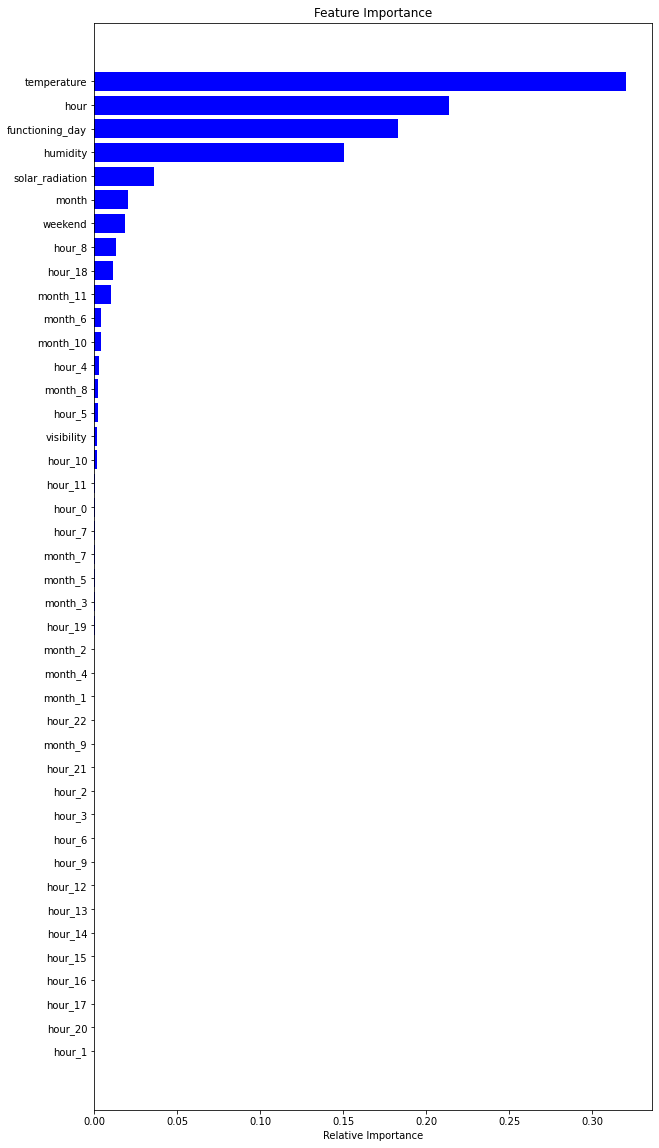

In [155]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

##**8. CONCLUSION**

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented 7 machine learning algorithms Linear Regression,lasso,ridge,elasticnet,decission tree, Random Forest and XGBoost. We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

In [157]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'], axis =1)
result

Training set                                             \
                             Model    MAE     MSE   RMSE R2_score Adjusted R2   
0               Linear regression   4.630  37.500  6.120    0.760        0.75   
1                Lasso regression   6.790  83.870  9.160    0.460        0.45   
2                Ridge regression   4.632  37.499  6.124    0.757        0.75   
3          Elastic net regression   5.740  57.470  7.580    0.630        0.62   
4        Dicision tree regression   5.063  56.339  7.506    0.635        0.63   
5        Random forest regression   0.820   1.820  1.350    0.990        0.99   
6    Gradient boosting regression   2.854  16.313  4.039    0.894        0.89   
7  Gradient Boosting gridsearchcv   1.760   7.561  2.750    0.951        0.95   

                          Test set                                             
                             Model    MAE     MSE   RMSE R2_score Adjusted R2  
0               Linear regression   4.780  39.750  6.310    0.750        0.74  
1                Lasso regression   6.944  85.679  9.256    0.453        0.44  
2                Ridge regression   4.780  39.752  6.305    0.746        0.74  
3      Elastic net regression Test  5.860  58.490  7.650    0.630        0.62  
4        Dicision tree regression   5.410  63.340  7.960    0.600        0.59  
5        Random forest regression   2.160  12.100  3.480    0.920        0.92  
6    Gradient boosting regression   3.071  18.088  4.253    0.885        0.88  
7  Gradient Boosting gridsearchcv   2.220  12.233  3.498    0.922        0.92


• No overfitting is seen.

• Random forest Regressor and Gradient Boosting gridsearchcv gives the highest R2 score of 99% and 95% recpectively for Train Set and 92% for Test set.

• Feature Importance value for Random Forest and Gradient Boost are different.

• We can deploy this model.


However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.

##### 1. Why did you pick the specific chart?

When presenting information in segments, bar charts should be used. Different categorical can be compared using vertical bar charts. provided that there aren't too many categories to compare. Time series data also greatly benefits from their use. So, I used bar chart to compare rented bike count with respect to month. I am comparing bike sharing demand in 12 different months to understand the demand of bike sharing.

##### 2. What is/are the insight(s) found from the chart?

* The above bar plot demonstrates that, in comparison to other months, demand for rented bikes is higher during the summer from May to October which is months number 5 to 10.
* Most demands are form the month of June which is month number 6.
* This might be because people wanted to 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

A method of renting bikes in which the entire city's membership, rental, and bike return procedures are automated are known as bike sharing systems. People can rent bikes from one location and return them to another as needed through these systems.

When we compare the number of bike rentals by month, we notice that June has the most, followed by July. This suggests that bike riders would rather ride in warmer, more pleasant climates than in colder ones.

#### Chart - 2 - Rented Bike Count Vs. weekdays_weekend

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average bike rented with respect to weekends, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

From above graph we can say that on Sundays people prefer to travel more than Mondays. Sunday is represented here by o and Monday is by 1. This is why Bike rented count is more on sundays than mondays

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Store can manage to access more bikes available for rent to increase the revenue as demand is on the higher side. Morever they also can start charging a small amount of premium for some extra addition.

#### Chart - 3 - Hourly Rented Bike Counts (Univariate Categorical Data)